In [69]:
# Import Statements
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df_cs = pd.read_csv('softwareengineer.csv') # Load 'Software Engineer' query data into DataFrame
df_cs

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Software Engineer,$60K-$63K (Glassdoor est.),Job Description\n\nCSI’s Payments Software Eng...,4.0,Computer Services\n4.0,"Valparaiso, IN","Paducah, KY",1001 to 5000 employees,1965,Company - Public,Financial Transaction Processing,Finance,$100 to $500 million (USD),-1
1,1,Software Engineer,$60K-$63K (Glassdoor est.),We are AAM. We have the POWER to move the worl...,3.3,American Axle & Manufacturing\n3.3,"Detroit, MI","Detroit, MI",10000+ employees,1994,Company - Public,Transportation Equipment Manufacturing,Manufacturing,$5 to $10 billion (USD),-1
2,2,Software Engineer,$60K-$63K (Glassdoor est.),Preferred Qualifications\nA strong foundation ...,3.9,Quicken Loans\n3.9,"Detroit, MI","Detroit, MI",10000+ employees,1985,Company - Private,Lending,Finance,$10+ billion (USD),"Citi, Bank of America, Wells Fargo"
3,3,Test Engineer,$60K-$63K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nBecom...",4.1,ManTech International Corporation\n4.1,"Clarksburg, WV","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
4,4,Lead Embedded Software Engineer - Wearables,$60K-$63K (Glassdoor est.),Job Description\n\n\nBose Corporation’s Consum...,3.6,Bose\n3.6,"Framingham, MA","Framingham, MA",5001 to 10000 employees,1964,Company - Private,Consumer Products Manufacturing,Manufacturing,$2 to $5 billion (USD),-1
5,5,Software Engineer II,$60K-$63K (Glassdoor est.),Software Engineer II\n\nThis Software Engineer...,3.0,Kryterion Inc\n3.0,"Phoenix, AZ","Phoenix, AZ",51 to 200 employees,2001,Company - Private,IT Services,Information Technology,$10 to $25 million (USD),"Pearson VUE, Prometric, PSI Services"
6,6,Software Engineer,$60K-$63K (Glassdoor est.),"Who We Are:\nBectran, Inc. was founded in 2010...",2.7,Bectran\n2.7,"Schaumburg, IL","Schaumburg, IL",51 to 200 employees,2010,Company - Private,Computer Hardware & Software,Information Technology,$10 to $25 million (USD),-1
7,7,Senior Software Engineer,$60K-$63K (Glassdoor est.),"Buildium is looking for smart, driven, enthusi...",4.8,Buildium\n4.8,"Boston, MA","Boston, MA",51 to 200 employees,2004,Company - Private,Computer Hardware & Software,Information Technology,Unknown / Non-Applicable,-1
8,8,"Jr. Software Engineer (JAVA, C/C++)",$60K-$63K (Glassdoor est.),Overview\n\n\nPeraton is seeking a highly moti...,3.4,Peraton\n3.4,"Aurora, CO","Herndon, VA",1001 to 5000 employees,2017,Company - Private,Aerospace & Defense,Aerospace & Defense,$1 to $2 billion (USD),-1
9,9,"Software Engineer - Remote, USA",$60K-$63K (Glassdoor est.),Are you passionate about building beautiful Us...,4.1,Guidewire Software\n4.1,Remote,"San Mateo, CA",1001 to 5000 employees,2001,Company - Public,Computer Hardware & Software,Information Technology,$500 million to $1 billion (USD),"Oracle, Accenture, Duck Creek Technologies"


In [3]:
df_cs['Job Title'].unique() # Overview of unique job titles

array(['Software Engineer', 'Test Engineer',
       'Lead Embedded Software Engineer - Wearables',
       'Software Engineer II', 'Senior Software Engineer',
       'Jr. Software Engineer (JAVA, C/C++)',
       'Software Engineer - Remote, USA', 'Software Developer (Back-End)',
       'Full-Stack Software Engineer',
       'L1 Modem Verification and Release Software Engineer',
       'Software Engineer - Web Applications',
       'Controls and Software Engineer', 'Web Application Developer',
       'Embedded Software Engineer', 'Software Development Engineer',
       'Software Integration Engineer', 'Software Support Engineer',
       'Transportation Design Engineer', 'Application Developer',
       'Software Engineer - Server Applications',
       'Manager, Software Engineering', 'Software Engineer - Membership',
       'Mid-Level Software Systems Engineer', 'Full Stack Engineer',
       'Full Stack Software Engineer', 'Backend Engineer',
       'Software Engineer Associate', 'Service

In [4]:
def standardize_title(title):
    
    title = title.lower()
    title = title.strip()
    
    seniority = ['senior', 'sr.', 'sr', 'lead', 'expert', 'experienced', 'principal']
    juniority = ['junior', 'jr.', 'jr']
    specialists = ['embedded', 'test', 'integration', 'design', 'front end', 'front-end', 'back end', 'back-end', 'full stack', 
                   'full-stack', 'data', 'database', 'firmware', 'platform', 'power', 'systems', 'systems', 'solutions', 'research']
    for i in seniority:
        if i in title:
            return 'senior'
    
    for i in juniority:
        if i in title:
            return 'junior'
    
    for i in specialists:
        if i in title:
            return 'other'
        
    else:
        return 'software engineer'


In [5]:
df_cs['title_simp'] = df_cs['Job Title'].apply(standardize_title)
df_cs.sample(5)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,title_simp
842,842,Big Data Engineer,$80K-$103K (Glassdoor est.),"At SpringML, we are all about empowering the d...",4.4,SpringML\n4.4,"Pleasanton, CA","Pleasanton, CA",1 to 50 employees,2015,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,-1,other
983,983,.NET Application Developer Intern- Summer,$80K-$103K (Glassdoor est.),A snapshot of what you would do:\n\nThe .Net A...,4.2,APEX Analytix\n4.2,"Greensboro, NC","Greensboro, NC",201 to 500 employees,1988,Company - Private,Enterprise Software & Network Solutions,Information Technology,$50 to $100 million (USD),-1,software engineer
331,331,Senior Software Engineer,$47K-$78K (Glassdoor est.),The medical software industry is experiencing ...,5.0,pMD\n5.0,Remote,"San Francisco, CA",1 to 50 employees,1998,Company - Private,Computer Hardware & Software,Information Technology,$10 to $25 million (USD),"Ingenious Med, MedAptus, PatientKeeper",senior
78,78,Software Engineer,$66K-$110K(Employer est.),"Software Engineer Columbia, MD\n\nSoftware Eng...",4.5,NuWave Solutions\n4.5,"Columbia, MD","Mc Lean, VA",51 to 200 employees,1999,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,software engineer
133,133,Software Engineer C++,$91K-$131K (Glassdoor est.),"About Kelvin\n\nFor Kelvin, the goal is contro...",3.5,Kelvin Inc.\n3.5,"Louisville, CO","San Francisco, CA",51 to 200 employees,2013,Company - Private,Computer Hardware & Software,Information Technology,Unknown / Non-Applicable,-1,software engineer


In [6]:
df_cs.title_simp.value_counts()

software engineer    478
senior               332
other                149
junior                41
Name: title_simp, dtype: int64

In [7]:
#def avg_salary(salary):
df_cs.get('Salary Estimate').unique()

array(['$60K-$63K (Glassdoor est.)', '$48K-$102K (Glassdoor est.)',
       '$66K-$110K(Employer est.)', '$60K-$100K(Employer est.)',
       '$91K-$131K (Glassdoor est.)', '$41K-$86K (Glassdoor est.)',
       '$100K-$124K (Glassdoor est.)', '$46K-$100K (Glassdoor est.)',
       '$70K-$130K(Employer est.)', '$70K-$100K(Employer est.)',
       '$47K-$78K (Glassdoor est.)', '$104K-$148K (Glassdoor est.)',
       '$80K-$103K (Glassdoor est.)'], dtype=object)

In [8]:
def salary_simplified(salary):
    salary_simp = salary.split('(')[0]
    return salary_simp.replace('K','').replace('$','')

In [9]:
df_cs['salary_simp'] = df_cs['Salary Estimate'].apply(salary_simplified)
df_cs

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,title_simp,salary_simp
0,0,Software Engineer,$60K-$63K (Glassdoor est.),Job Description\n\nCSI’s Payments Software Eng...,4.0,Computer Services\n4.0,"Valparaiso, IN","Paducah, KY",1001 to 5000 employees,1965,Company - Public,Financial Transaction Processing,Finance,$100 to $500 million (USD),-1,software engineer,60-63
1,1,Software Engineer,$60K-$63K (Glassdoor est.),We are AAM. We have the POWER to move the worl...,3.3,American Axle & Manufacturing\n3.3,"Detroit, MI","Detroit, MI",10000+ employees,1994,Company - Public,Transportation Equipment Manufacturing,Manufacturing,$5 to $10 billion (USD),-1,software engineer,60-63
2,2,Software Engineer,$60K-$63K (Glassdoor est.),Preferred Qualifications\nA strong foundation ...,3.9,Quicken Loans\n3.9,"Detroit, MI","Detroit, MI",10000+ employees,1985,Company - Private,Lending,Finance,$10+ billion (USD),"Citi, Bank of America, Wells Fargo",software engineer,60-63
3,3,Test Engineer,$60K-$63K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nBecom...",4.1,ManTech International Corporation\n4.1,"Clarksburg, WV","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1,other,60-63
4,4,Lead Embedded Software Engineer - Wearables,$60K-$63K (Glassdoor est.),Job Description\n\n\nBose Corporation’s Consum...,3.6,Bose\n3.6,"Framingham, MA","Framingham, MA",5001 to 10000 employees,1964,Company - Private,Consumer Products Manufacturing,Manufacturing,$2 to $5 billion (USD),-1,senior,60-63
5,5,Software Engineer II,$60K-$63K (Glassdoor est.),Software Engineer II\n\nThis Software Engineer...,3.0,Kryterion Inc\n3.0,"Phoenix, AZ","Phoenix, AZ",51 to 200 employees,2001,Company - Private,IT Services,Information Technology,$10 to $25 million (USD),"Pearson VUE, Prometric, PSI Services",software engineer,60-63
6,6,Software Engineer,$60K-$63K (Glassdoor est.),"Who We Are:\nBectran, Inc. was founded in 2010...",2.7,Bectran\n2.7,"Schaumburg, IL","Schaumburg, IL",51 to 200 employees,2010,Company - Private,Computer Hardware & Software,Information Technology,$10 to $25 million (USD),-1,software engineer,60-63
7,7,Senior Software Engineer,$60K-$63K (Glassdoor est.),"Buildium is looking for smart, driven, enthusi...",4.8,Buildium\n4.8,"Boston, MA","Boston, MA",51 to 200 employees,2004,Company - Private,Computer Hardware & Software,Information Technology,Unknown / Non-Applicable,-1,senior,60-63
8,8,"Jr. Software Engineer (JAVA, C/C++)",$60K-$63K (Glassdoor est.),Overview\n\n\nPeraton is seeking a highly moti...,3.4,Peraton\n3.4,"Aurora, CO","Herndon, VA",1001 to 5000 employees,2017,Company - Private,Aerospace & Defense,Aerospace & Defense,$1 to $2 billion (USD),-1,junior,60-63
9,9,"Software Engineer - Remote, USA",$60K-$63K (Glassdoor est.),Are you passionate about building beautiful Us...,4.1,Guidewire Software\n4.1,Remote,"San Mateo, CA",1001 to 5000 employees,2001,Company - Public,Computer Hardware & Software,Information Technology,$500 million to $1 billion (USD),"Oracle, Accenture, Duck Creek Technologies",software engineer,60-63


In [10]:
df_cs.salary_simp.value_counts()

80-103      618
70-100       32
91-131       32
46-100       32
41-86        32
104-148      32
47-78        32
60-100       32
48-102       32
70-130       32
66-110       32
100-124      32
60-63        30
Name: salary_simp, dtype: int64

In [11]:
def get_state(location):
    state_ab = location.split(',')[-1]
#     if 'Remote' in location:
#         return 
        
    return state_ab

In [17]:
def get_city(location):
    city = location.split(',')[0]
    return city

In [18]:
df_cs['city_simp'] = df_cs['Location'].apply(get_city)
df_cs

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,title_simp,salary_simp,state_simp,city_simp
0,0,Software Engineer,$60K-$63K (Glassdoor est.),Job Description\n\nCSI’s Payments Software Eng...,4.0,Computer Services\n4.0,"Valparaiso, IN","Paducah, KY",1001 to 5000 employees,1965,Company - Public,Financial Transaction Processing,Finance,$100 to $500 million (USD),-1,software engineer,60-63,IN,Valparaiso
1,1,Software Engineer,$60K-$63K (Glassdoor est.),We are AAM. We have the POWER to move the worl...,3.3,American Axle & Manufacturing\n3.3,"Detroit, MI","Detroit, MI",10000+ employees,1994,Company - Public,Transportation Equipment Manufacturing,Manufacturing,$5 to $10 billion (USD),-1,software engineer,60-63,MI,Detroit
2,2,Software Engineer,$60K-$63K (Glassdoor est.),Preferred Qualifications\nA strong foundation ...,3.9,Quicken Loans\n3.9,"Detroit, MI","Detroit, MI",10000+ employees,1985,Company - Private,Lending,Finance,$10+ billion (USD),"Citi, Bank of America, Wells Fargo",software engineer,60-63,MI,Detroit
3,3,Test Engineer,$60K-$63K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nBecom...",4.1,ManTech International Corporation\n4.1,"Clarksburg, WV","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1,other,60-63,WV,Clarksburg
4,4,Lead Embedded Software Engineer - Wearables,$60K-$63K (Glassdoor est.),Job Description\n\n\nBose Corporation’s Consum...,3.6,Bose\n3.6,"Framingham, MA","Framingham, MA",5001 to 10000 employees,1964,Company - Private,Consumer Products Manufacturing,Manufacturing,$2 to $5 billion (USD),-1,senior,60-63,MA,Framingham
5,5,Software Engineer II,$60K-$63K (Glassdoor est.),Software Engineer II\n\nThis Software Engineer...,3.0,Kryterion Inc\n3.0,"Phoenix, AZ","Phoenix, AZ",51 to 200 employees,2001,Company - Private,IT Services,Information Technology,$10 to $25 million (USD),"Pearson VUE, Prometric, PSI Services",software engineer,60-63,AZ,Phoenix
6,6,Software Engineer,$60K-$63K (Glassdoor est.),"Who We Are:\nBectran, Inc. was founded in 2010...",2.7,Bectran\n2.7,"Schaumburg, IL","Schaumburg, IL",51 to 200 employees,2010,Company - Private,Computer Hardware & Software,Information Technology,$10 to $25 million (USD),-1,software engineer,60-63,IL,Schaumburg
7,7,Senior Software Engineer,$60K-$63K (Glassdoor est.),"Buildium is looking for smart, driven, enthusi...",4.8,Buildium\n4.8,"Boston, MA","Boston, MA",51 to 200 employees,2004,Company - Private,Computer Hardware & Software,Information Technology,Unknown / Non-Applicable,-1,senior,60-63,MA,Boston
8,8,"Jr. Software Engineer (JAVA, C/C++)",$60K-$63K (Glassdoor est.),Overview\n\n\nPeraton is seeking a highly moti...,3.4,Peraton\n3.4,"Aurora, CO","Herndon, VA",1001 to 5000 employees,2017,Company - Private,Aerospace & Defense,Aerospace & Defense,$1 to $2 billion (USD),-1,junior,60-63,CO,Aurora
9,9,"Software Engineer - Remote, USA",$60K-$63K (Glassdoor est.),Are you passionate about building beautiful Us...,4.1,Guidewire Software\n4.1,Remote,"San Mateo, CA",1001 to 5000 employees,2001,Company - Public,Computer Hardware & Software,Information Technology,$500 million to $1 billion (USD),"Oracle, Accenture, Duck Creek Technologies",software engineer,60-63,Remote,Remote


In [27]:
city_g = df_cs.groupby('city_simp').count()
slc = city_g.loc['Salt Lake City']
slc

Unnamed: 0           43
Job Title            43
Salary Estimate      43
Job Description      43
Rating               43
Company Name         43
Location             43
Headquarters         43
Size                 43
Founded              43
Type of ownership    43
Industry             43
Sector               43
Revenue              43
Competitors          43
title_simp           43
salary_simp          43
state_simp           43
Name: Salt Lake City, dtype: int64

In [36]:
def salary_min(salary):
    salary_number = salary.split('-')[0]
    return int(salary_number)


In [38]:
def salary_max(salary):
    salary_number = salary.split('-')[1]
    return int(salary_number)

In [39]:
df_cs['first nmber'] = df_cs['salary_simp'].apply(salary_min)
df_cs['second nmber'] = df_cs['salary_simp'].apply(salary_max)
df_cs

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,Industry,Sector,Revenue,Competitors,title_simp,salary_simp,state_simp,city_simp,first nmber,second nmber
0,0,Software Engineer,$60K-$63K (Glassdoor est.),Job Description\n\nCSI’s Payments Software Eng...,4.0,Computer Services\n4.0,"Valparaiso, IN","Paducah, KY",1001 to 5000 employees,1965,...,Financial Transaction Processing,Finance,$100 to $500 million (USD),-1,software engineer,60-63,IN,Valparaiso,60,63
1,1,Software Engineer,$60K-$63K (Glassdoor est.),We are AAM. We have the POWER to move the worl...,3.3,American Axle & Manufacturing\n3.3,"Detroit, MI","Detroit, MI",10000+ employees,1994,...,Transportation Equipment Manufacturing,Manufacturing,$5 to $10 billion (USD),-1,software engineer,60-63,MI,Detroit,60,63
2,2,Software Engineer,$60K-$63K (Glassdoor est.),Preferred Qualifications\nA strong foundation ...,3.9,Quicken Loans\n3.9,"Detroit, MI","Detroit, MI",10000+ employees,1985,...,Lending,Finance,$10+ billion (USD),"Citi, Bank of America, Wells Fargo",software engineer,60-63,MI,Detroit,60,63
3,3,Test Engineer,$60K-$63K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nBecom...",4.1,ManTech International Corporation\n4.1,"Clarksburg, WV","Herndon, VA",5001 to 10000 employees,1968,...,Research & Development,Business Services,$1 to $2 billion (USD),-1,other,60-63,WV,Clarksburg,60,63
4,4,Lead Embedded Software Engineer - Wearables,$60K-$63K (Glassdoor est.),Job Description\n\n\nBose Corporation’s Consum...,3.6,Bose\n3.6,"Framingham, MA","Framingham, MA",5001 to 10000 employees,1964,...,Consumer Products Manufacturing,Manufacturing,$2 to $5 billion (USD),-1,senior,60-63,MA,Framingham,60,63
5,5,Software Engineer II,$60K-$63K (Glassdoor est.),Software Engineer II\n\nThis Software Engineer...,3.0,Kryterion Inc\n3.0,"Phoenix, AZ","Phoenix, AZ",51 to 200 employees,2001,...,IT Services,Information Technology,$10 to $25 million (USD),"Pearson VUE, Prometric, PSI Services",software engineer,60-63,AZ,Phoenix,60,63
6,6,Software Engineer,$60K-$63K (Glassdoor est.),"Who We Are:\nBectran, Inc. was founded in 2010...",2.7,Bectran\n2.7,"Schaumburg, IL","Schaumburg, IL",51 to 200 employees,2010,...,Computer Hardware & Software,Information Technology,$10 to $25 million (USD),-1,software engineer,60-63,IL,Schaumburg,60,63
7,7,Senior Software Engineer,$60K-$63K (Glassdoor est.),"Buildium is looking for smart, driven, enthusi...",4.8,Buildium\n4.8,"Boston, MA","Boston, MA",51 to 200 employees,2004,...,Computer Hardware & Software,Information Technology,Unknown / Non-Applicable,-1,senior,60-63,MA,Boston,60,63
8,8,"Jr. Software Engineer (JAVA, C/C++)",$60K-$63K (Glassdoor est.),Overview\n\n\nPeraton is seeking a highly moti...,3.4,Peraton\n3.4,"Aurora, CO","Herndon, VA",1001 to 5000 employees,2017,...,Aerospace & Defense,Aerospace & Defense,$1 to $2 billion (USD),-1,junior,60-63,CO,Aurora,60,63
9,9,"Software Engineer - Remote, USA",$60K-$63K (Glassdoor est.),Are you passionate about building beautiful Us...,4.1,Guidewire Software\n4.1,Remote,"San Mateo, CA",1001 to 5000 employees,2001,...,Computer Hardware & Software,Information Technology,$500 million to $1 billion (USD),"Oracle, Accenture, Duck Creek Technologies",software engineer,60-63,Remote,Remote,60,63


In [12]:
df_cs['state_simp'] = df_cs['Location'].apply(get_state)
df_cs

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,title_simp,salary_simp,state_simp
0,0,Software Engineer,$60K-$63K (Glassdoor est.),Job Description\n\nCSI’s Payments Software Eng...,4.0,Computer Services\n4.0,"Valparaiso, IN","Paducah, KY",1001 to 5000 employees,1965,Company - Public,Financial Transaction Processing,Finance,$100 to $500 million (USD),-1,software engineer,60-63,IN
1,1,Software Engineer,$60K-$63K (Glassdoor est.),We are AAM. We have the POWER to move the worl...,3.3,American Axle & Manufacturing\n3.3,"Detroit, MI","Detroit, MI",10000+ employees,1994,Company - Public,Transportation Equipment Manufacturing,Manufacturing,$5 to $10 billion (USD),-1,software engineer,60-63,MI
2,2,Software Engineer,$60K-$63K (Glassdoor est.),Preferred Qualifications\nA strong foundation ...,3.9,Quicken Loans\n3.9,"Detroit, MI","Detroit, MI",10000+ employees,1985,Company - Private,Lending,Finance,$10+ billion (USD),"Citi, Bank of America, Wells Fargo",software engineer,60-63,MI
3,3,Test Engineer,$60K-$63K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nBecom...",4.1,ManTech International Corporation\n4.1,"Clarksburg, WV","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1,other,60-63,WV
4,4,Lead Embedded Software Engineer - Wearables,$60K-$63K (Glassdoor est.),Job Description\n\n\nBose Corporation’s Consum...,3.6,Bose\n3.6,"Framingham, MA","Framingham, MA",5001 to 10000 employees,1964,Company - Private,Consumer Products Manufacturing,Manufacturing,$2 to $5 billion (USD),-1,senior,60-63,MA
5,5,Software Engineer II,$60K-$63K (Glassdoor est.),Software Engineer II\n\nThis Software Engineer...,3.0,Kryterion Inc\n3.0,"Phoenix, AZ","Phoenix, AZ",51 to 200 employees,2001,Company - Private,IT Services,Information Technology,$10 to $25 million (USD),"Pearson VUE, Prometric, PSI Services",software engineer,60-63,AZ
6,6,Software Engineer,$60K-$63K (Glassdoor est.),"Who We Are:\nBectran, Inc. was founded in 2010...",2.7,Bectran\n2.7,"Schaumburg, IL","Schaumburg, IL",51 to 200 employees,2010,Company - Private,Computer Hardware & Software,Information Technology,$10 to $25 million (USD),-1,software engineer,60-63,IL
7,7,Senior Software Engineer,$60K-$63K (Glassdoor est.),"Buildium is looking for smart, driven, enthusi...",4.8,Buildium\n4.8,"Boston, MA","Boston, MA",51 to 200 employees,2004,Company - Private,Computer Hardware & Software,Information Technology,Unknown / Non-Applicable,-1,senior,60-63,MA
8,8,"Jr. Software Engineer (JAVA, C/C++)",$60K-$63K (Glassdoor est.),Overview\n\n\nPeraton is seeking a highly moti...,3.4,Peraton\n3.4,"Aurora, CO","Herndon, VA",1001 to 5000 employees,2017,Company - Private,Aerospace & Defense,Aerospace & Defense,$1 to $2 billion (USD),-1,junior,60-63,CO
9,9,"Software Engineer - Remote, USA",$60K-$63K (Glassdoor est.),Are you passionate about building beautiful Us...,4.1,Guidewire Software\n4.1,Remote,"San Mateo, CA",1001 to 5000 employees,2001,Company - Public,Computer Hardware & Software,Information Technology,$500 million to $1 billion (USD),"Oracle, Accenture, Duck Creek Technologies",software engineer,60-63,Remote


In [16]:
states = df_cs.get('state_simp').value_counts()
states

 VA              144
 CA              128
 MA               81
 IL               63
 UT               53
 AZ               46
 MD               45
 NY               44
 NC               44
 WA               31
 FL               31
 MO               29
 TX               28
 OH               27
 OK               24
 DC               23
 ID               22
 NE               21
 PA               13
 CO               13
United States     12
 MI                9
 IN                6
 NJ                5
 WI                5
 IA                5
 MN                4
 SC                4
Remote             4
 GA                4
 AL                4
 OR                3
 CT                3
 LA                3
 KY                3
Phoenix            2
 AR                2
 KS                2
New Jersey         1
 TN                1
 NM                1
 DE                1
 MS                1
 VT                1
 SD                1
 WV                1
 NH                1
Wisconsin    

In [47]:
df_cs_grouped = df_cs.groupby('state_simp').mean()
df_cs_grouped

,Unnamed: 0,Rating,Founded,first nmber,second nmber
state_simp,,,,,
AL,217.250000,3.525000,2005.000000,90.250000,119.750000
AR,202.000000,4.200000,1988.000000,43.500000,93.000000
AZ,558.152174,3.460870,1992.608696,76.565217,103.130435
CA,501.484375,3.118750,1579.726562,75.367188,104.992188
CO,152.538462,3.069231,1687.461538,65.461538,106.153846
CT,198.666667,3.500000,2006.000000,62.666667,110.666667
DC,622.434783,4.130435,2006.956522,79.826087,104.086957
DE,153.000000,3.000000,2005.000000,91.000000,131.000000
FL,489.161290,0.774194,768.290323,74.483871,104.838710


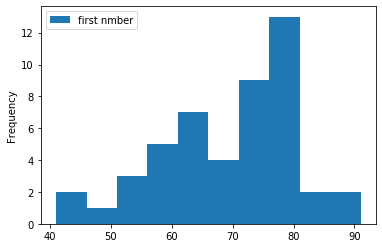

In [51]:
df_cs_grouped.plot(kind = 'hist', y = 'first nmber')

In [78]:
mini = df_cs.get('first nmber')
maxi = df_cs.get('second nmber')
df_minmax = pd.DataFrame().assign(MAX = maxi, MIN = mini)

df_minmax = df_minmax.drop_duplicates()
df_minmax

# df_minmax.pivot("MAX", "MIN").plot(kind='bar')

# plt.show()

,MAX,MIN
0,63,60
30,102,48
62,110,66
94,100,60
126,131,91
158,86,41
190,124,100
222,100,46
254,130,70
286,100,70


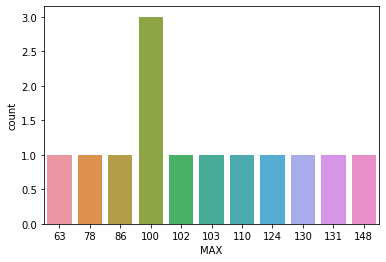

In [75]:
x = sns.countplot(x='MAX',  
              data=df_minmax)


In [80]:
df_test = pd.DataFrame({'speed': mini,
                   'lifespan': maxi})


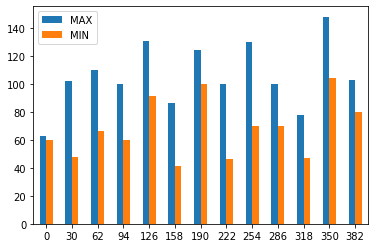

In [82]:
ax = df_minmax.plot.bar(rot=0)

In [94]:
g = sns.catplot(x="MAX", y="MIN",  data=df_minmax,
                height=1, kind="bar", palette="muted")

ValueError: could not broadcast input array from shape (13,2) into shape (13)